Question1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?


**Answer:**
Ensemble learning combines multiple base models (often called weak learners) to build a stronger predictive model. The fundamental idea is that a group of weak models working together can outperform a single strong model, especially by reducing variance or bias.


Bagging (Bootstrap Aggregating):
- Trains multiple models independently in parallel on different bootstrap samples of data.
- Each model gets a random subset of data (with replacement).
- Final prediction is the average (for regression) or majority vote (for classification).
- Goal: Reduce variance and avoid overfitting.
- Example: Random Forest.


Boosting:
- Trains models sequentially where each new model focuses on correcting the errors of the previous ones.
- Assigns weights to misclassified samples to emphasize difficult cases.
- Combines weak learners into a strong one using weighted voting or additive models.
- Goal: Reduce bias and improve accuracy.
- Examples: AdaBoost, Gradient Boosting.

Question2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.


**Answer:**
Random Forest reduces overfitting by combining many decision trees trained on different random subsets of data and features. Each tree individually may overfit, but averaging their predictions reduces variance and improves generalization.


How it reduces overfitting:
- Bootstrap sampling ensures diverse subsets of data for each tree.
- Random feature selection decorrelates trees, preventing them from learning the same splits.
- The aggregated prediction averages out noise from individual trees.


Key Hyperparameters:
1. **n_estimators:** Number of trees in the forest. More trees generally reduce variance.
2. **max_features / max_depth:** Control how complex each tree is and how many features are considered per split. Limiting them reduces overfitting.

Question3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.


**Answer:**
Stacking (Stacked Generalization) is an ensemble method that combines predictions from multiple base learners (Level-0 models) using a meta-learner (Level-1 model). The meta-learner learns how to optimally combine the outputs of base models.


Differences from Bagging/Boosting:
- Bagging combines similar models trained on random samples (parallel approach).
- Boosting combines models sequentially, focusing on correcting previous errors.
- Stacking combines diverse models and uses another model to learn the best combination.


Example Use Case:
Combine Logistic Regression, Random Forest, and SVM as base models and use a Gradient Boosting model as a meta-learner to achieve higher accuracy.

Question4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?


**Answer:**
The Out-Of-Bag (OOB) Score measures model performance using data not included in each tree’s bootstrap sample. On average, around 37% of data points are left out of training for any given tree.


Each tree predicts its OOB samples, and these predictions are aggregated to compute the OOB accuracy. This gives an unbiased estimate of model performance without needing a separate validation set.


Advantages:
- Saves time and data by avoiding an explicit validation split.
- Provides a built-in cross-validation-like estimate.

Question5: Compare AdaBoost and Gradient Boosting in terms of how they handle errors from weak learners, weight adjustment mechanism, and typical use cases.


**Answer:**
AdaBoost and Gradient Boosting are both boosting algorithms that build strong models from weak learners, but they differ in how they handle errors and adjust weights.


AdaBoost:
- Increases the weights of misclassified samples after each iteration.
- Combines weak learners through weighted voting.
- Performs best with simple models (e.g., decision stumps).
- Sensitive to noise and outliers.


Gradient Boosting:
- Fits each new learner to the residuals (errors) of the previous model.
- Uses gradients of a loss function instead of adjusting weights directly.
- Handles various loss functions and is more robust.
- Used in advanced frameworks like XGBoost, LightGBM, and CatBoost.

Question6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.


**Answer:**
CatBoost efficiently handles categorical variables using target statistics and permutation-based encoding techniques that prevent target leakage.


- Converts categorical values into numerical representations using mean target values in an ordered way (ordered boosting).
- Applies permutations of data to ensure encoding doesn’t use future information.
- Automatically combines categorical features to capture interactions.
- This eliminates the need for one-hot encoding and reduces overfitting.

In [1]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
# 1. Load Wine dataset
# 2. Split data into 70% train, 30% test
# 3. Train KNN (K=5) without scaling and evaluate accuracy, precision, recall, F1-score
# 4. Apply StandardScaler, retrain, and compare metrics
# 5. Use GridSearchCV to find the best K (1–20) and distance metric (Euclidean, Manhattan)
# 6. Train optimized KNN and compare results


from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# Load dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Train KNN (no scaling)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy (No Scaling):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Train with scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
knn.fit(X_train_s, y_train)
y_pred_s = knn.predict(X_test_s)
print("\nAccuracy (With Scaling):", accuracy_score(y_test, y_pred_s))
print(classification_report(y_test, y_pred_s))


# GridSearch for best parameters
param_grid = {'n_neighbors': np.arange(1,21), 'metric': ['minkowski','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_s, y_train)
print("\nBest Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


# Evaluate optimized model
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_s)
print("\nOptimized Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Accuracy (No Scaling): 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


Accuracy (With Scaling): 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Best Parameters: {'metric': 'minkowski', 'n_neighbors': np.int64(11)}
Best CV Accuracy: 0.9756666666666666

Optimized Model Accuracy: 0.96296296296296

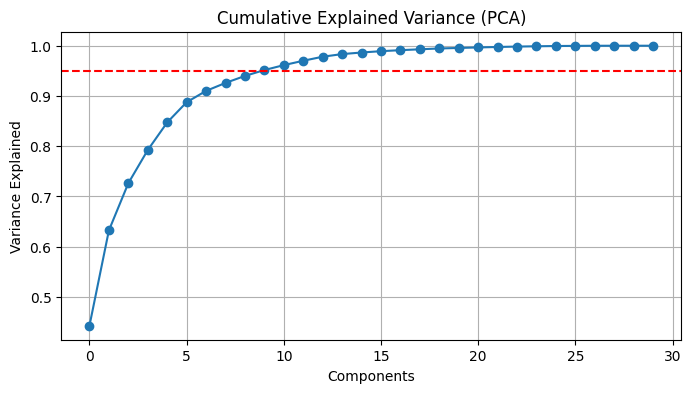

Accuracy (Original): 0.9590643274853801
Accuracy (After PCA): 0.9649122807017544


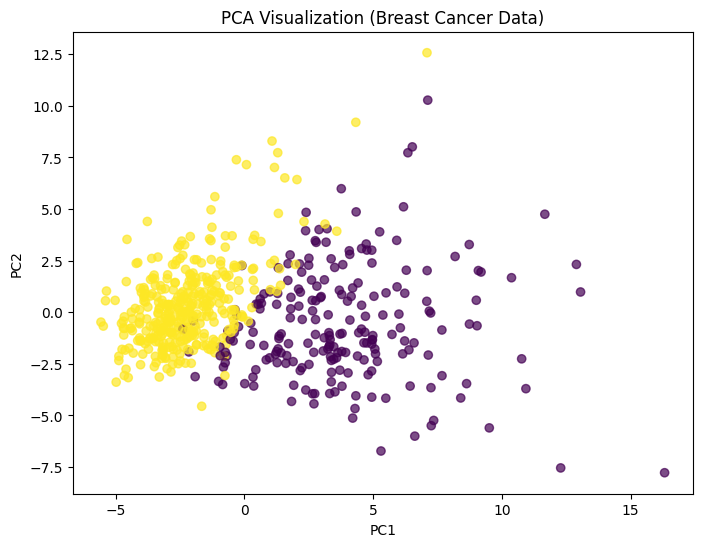

In [2]:
# Question 8: PCA + KNN with Variance Analysis and Visualization
# 1. Load Breast Cancer dataset
# 2. Apply PCA and plot cumulative explained variance
# 3. Retain 95% variance and transform data
# 4. Train KNN on original and PCA data and compare accuracy
# 5. Visualize first two principal components


from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


# Load and scale data
bc = load_breast_cancer()
X, y = bc.data, bc.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA variance analysis
pca = PCA().fit(X_scaled)
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance (PCA)')
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


# Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)


# Compare KNN on original vs PCA data
X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
acc_orig = accuracy_score(y_te, knn.predict(X_te))


X_tr_p, X_te_p, y_tr_p, y_te_p = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn.fit(X_tr_p, y_tr_p)
acc_pca = accuracy_score(y_te_p, knn.predict(X_te_p))


print("Accuracy (Original):", acc_orig)
print("Accuracy (After PCA):", acc_pca)


# Visualize first 2 PCs
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization (Breast Cancer Data)')
plt.show()

MSE (Euclidean, K=5): 4803.90558674207
MSE (Manhattan, K=5): 5210.225816542467


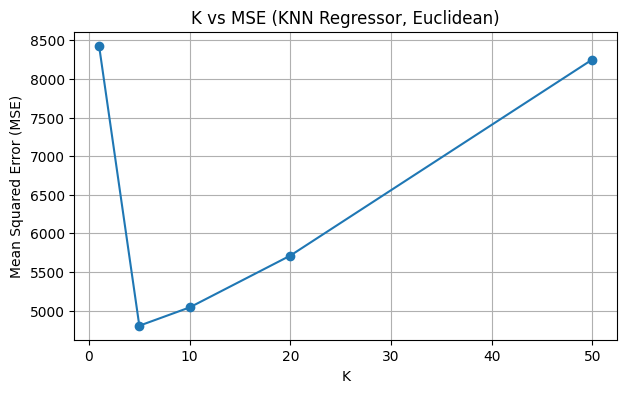

K = 1 -> MSE = 8430.4212
K = 5 -> MSE = 4803.9056
K = 10 -> MSE = 5041.1077
K = 20 -> MSE = 5712.0191
K = 50 -> MSE = 8251.3713


In [5]:
# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis
# 1. Generate synthetic regression dataset
# 2. Train KNN with Euclidean and Manhattan distances (K=5) and compare MSE
# 3. Test K = [1,5,10,20,50] and plot K vs MSE

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Split into train/test
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

# Euclidean distance (p=2), K=5
knn_euc = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euc.fit(X_tr, y_tr)
y_pred_euc = knn_euc.predict(X_te)
mse_euc = mean_squared_error(y_te, y_pred_euc)

# Manhattan distance (p=1), K=5
knn_man = KNeighborsRegressor(n_neighbors=5, p=1)
knn_man.fit(X_tr, y_tr)
y_pred_man = knn_man.predict(X_te)
mse_man = mean_squared_error(y_te, y_pred_man)

print("MSE (Euclidean, K=5):", mse_euc)
print("MSE (Manhattan, K=5):", mse_man)

# K vs MSE analysis
Ks = [1, 5, 10, 20, 50]
mses = []
for k in Ks:
    model = KNeighborsRegressor(n_neighbors=k, p=2)  # using Euclidean for K sweep
    model.fit(X_tr, y_tr)
    pred = model.predict(X_te)
    mses.append(mean_squared_error(y_te, pred))

# Plot K vs MSE
plt.figure(figsize=(7,4))
plt.plot(Ks, mses, marker='o')
plt.xlabel('K')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs MSE (KNN Regressor, Euclidean)')
plt.grid(True)
plt.show()

# Print values
for k, m in zip(Ks, mses):
    print(f"K = {k} -> MSE = {m:.4f}")

=== KNN Algorithm Comparison ===
brute: Accuracy=0.7056, Training Time=0.0054s
kd_tree: Accuracy=0.7056, Training Time=0.0221s
ball_tree: Accuracy=0.7056, Training Time=0.0167s


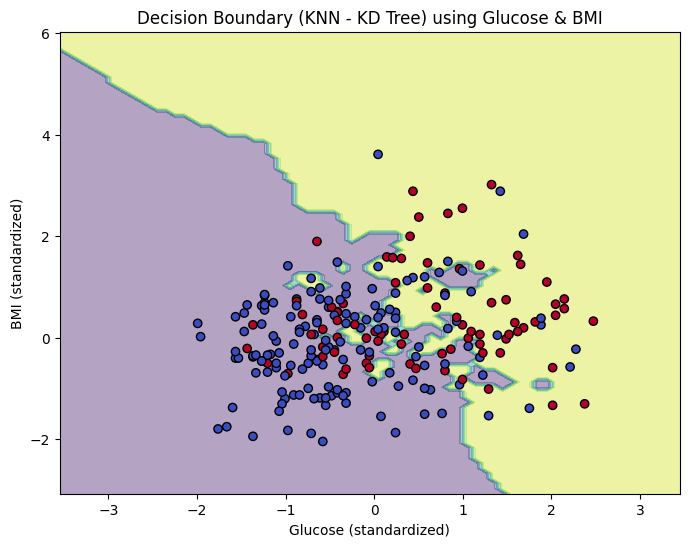

In [6]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Pima Indians Diabetes)
# 1. Load dataset
# 2. Impute missing values using KNNImputer
# 3. Train KNN using Brute-force, KD-Tree, and Ball Tree
# 4. Compare accuracy and training time
# 5. Plot decision boundary using 2 most important features

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)

# 2. Replace zeros with NaN for specific columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols:
    df[c] = df[c].replace(0, np.nan)

# 3. Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome']

# 4. Split and scale data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_te_s = scaler.transform(X_te)

# 5. Compare algorithms (brute, kd_tree, ball_tree)
print("=== KNN Algorithm Comparison ===")
methods = ['brute', 'kd_tree', 'ball_tree']
results = []

for m in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=m)
    knn.fit(X_tr_s, y_tr)
    acc = accuracy_score(y_te, knn.predict(X_te_s))
    duration = time.time() - start
    results.append((m, acc, duration))
    print(f"{m}: Accuracy={acc:.4f}, Training Time={duration:.4f}s")

# 6. Plot decision boundary using 2 most important features
# Let's use 'Glucose' and 'BMI' as the most important features

feature_idx = [1, 4]  # Glucose=1, BMI=4
X_plot = df[['Glucose', 'BMI']].values
y_plot = df['Outcome'].values

# Handle NaN values again
X_plot = imputer.fit_transform(X_plot)
X_plot = StandardScaler().fit_transform(X_plot)

X_tr_p, X_te_p, y_tr_p, y_te_p = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn.fit(X_tr_p, y_tr_p)

# Create meshgrid for plotting
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_te_p[:, 0], X_te_p[:, 1], c=y_te_p, edgecolor='k', cmap='coolwarm')
plt.title("Decision Boundary (KNN - KD Tree) using Glucose & BMI")
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.show()